In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\2000p\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\2000p\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
data = pd.read_csv('AmazonReview.csv')
data.head()


,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [5]:
data.dropna(inplace=True)


In [6]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1



In [7]:
stp_words=stopwords.words('english')
def clean_review(review):
    cleanreview=" ".join(word for word in review.
                        split() if word not in stp_words)
    return cleanreview

data['Review']=data['Review'].apply(clean_review)



In [8]:
data.head()


,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [9]:
data['Sentiment'].value_counts()


0    15000
1     9999
Name: Sentiment, dtype: int64

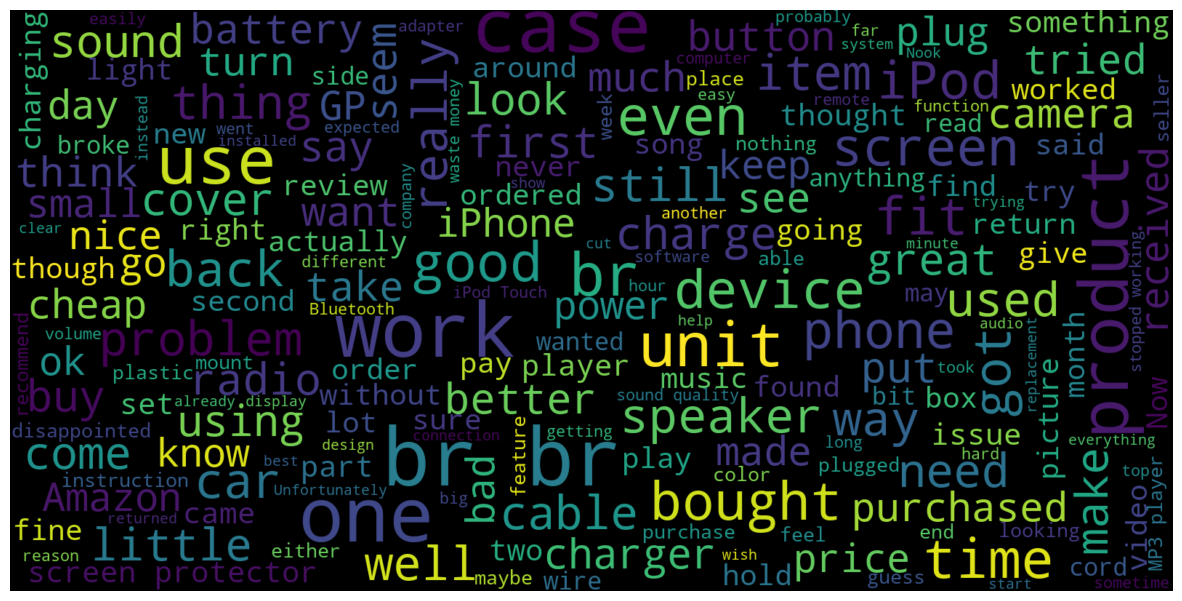

In [10]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

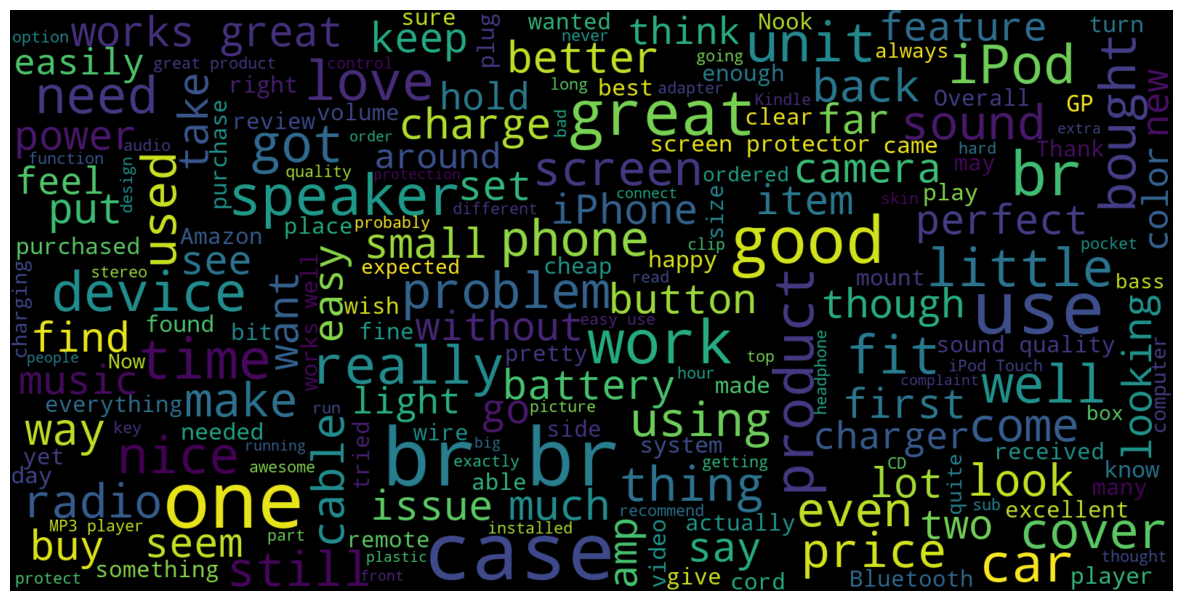

In [11]:
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [12]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()

In [13]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
model=LogisticRegression()
 
#Model fitting
model.fit(x_train,y_train)
 
#testing the model
pred=model.predict(x_test)
 
#model accuracy
print(accuracy_score(y_test,pred))

0.81632


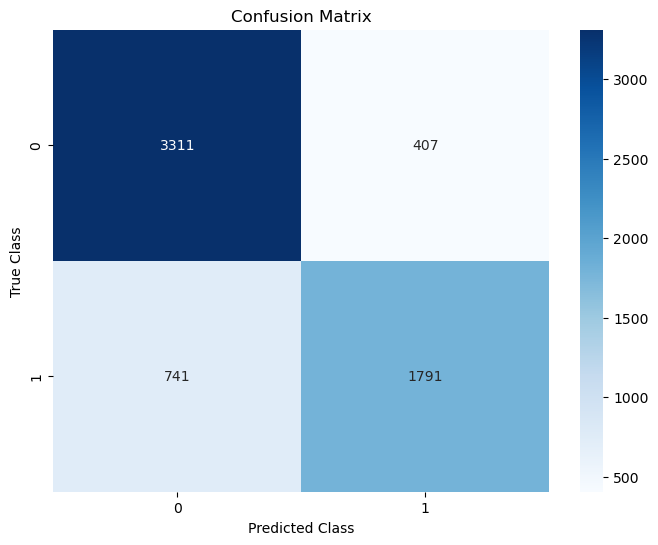

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Set labels and title for the plot
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

plt.show()

In [108]:
t="I bougth this micro SD card after some trubles with other that i got from Kingston, i can tell that SanDisk is other quality, this is the best, my i9300 phone can read a 64GB very fast, the dta transfer speed from my pc to my is amazing, if you are looking for additional storage to you phone, for music, pictures and other type of files, this is for you.Pros-Very good quality materials of construction-Amazing speedUpdate after one year this memory is damaged I can not delete or put new files on it, I can not format this memory, I tried to format with my phone, with my pc, with a camera and nothing, now this is like a 64gb cd, the data in the memory is only available to read but I can not move, or delete it, I bought this memory to be used to backup all my data of my android device but now is only a readable memory I can not write data on it any more, I hope sandisk make a better products in the future!!! Total disagree I will buy a Samsung memory card expected a better quality."
t_e=cv.transform([t]).toarray()

In [111]:

test = model.predict_proba(t_e)
print(test[0][1])

0.3358758006122794


In [112]:
import pickle


In [113]:
with open('logreg_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [114]:
with open('tfidf.pkl', 'wb') as file:
    pickle.dump(cv, file)